<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/HCHO-level-Time-series-forecasting/blob/main/DE_2_NASA_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=9fd38a700e2a1972b01c1811a9ab9981f6b387b13577d2105c0a2161da475615
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions  as pyspark_functions
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import col, regexp_replace, when
from pyspark.sql.types import StructType, StructField, DoubleType, StringType

In [5]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [106]:
colombo_csv_path = '/content/drive/MyDrive/data engineering CW/colombo_df.csv'
deniyaya_matara_csv_path = '/content/drive/MyDrive/data engineering CW/deniyaya_matara_df.csv'
nuwara_eliya_csv_path = '/content/drive/MyDrive/data engineering CW/nuwara_eliya_df.csv'
bibile_monaragala_csv_path = '/content/drive/MyDrive/data engineering CW/bibile_monaragala_df.csv'
kurunegala_csv_path = '/content/drive/MyDrive/data engineering CW/kurunegala_df.csv'
jaffna_csv_path = '/content/drive/MyDrive/data engineering CW/jaffna_df.csv'
kandy_csv_path = '/content/drive/MyDrive/data engineering CW/kandy_df.csv'

In [107]:
colombo_df = spark.read.csv(colombo_csv_path,header = True)
deniyaya_matara_df = spark.read.csv(deniyaya_matara_csv_path,header = True)
nuwara_eliya_df = spark.read.csv(nuwara_eliya_csv_path,header = True)
bibile_monaragala_df = spark.read.csv(bibile_monaragala_csv_path,header = True)
jaffna_df = spark.read.csv(jaffna_csv_path,header = True)
kandy_df = spark.read.csv(kandy_csv_path ,header = True)
kurunegala_df=spark.read.csv(kurunegala_csv_path,header = True)

In [108]:
colombo_df.show()

+--------------+------------+----------+--------------------+
|      Location|Current Date| Next Date|        HCHO reading|
+--------------+------------+----------+--------------------+
|Colombo Proper|  2019-01-01|2019-01-02|1.969834395781014...|
|Colombo Proper|  2019-01-02|2019-01-03|2.625522171968594...|
|Colombo Proper|  2019-01-03|2019-01-04|9.852118897938794E-5|
|Colombo Proper|  2019-01-04|2019-01-05|2.099320518114242E-4|
|Colombo Proper|  2019-01-05|2019-01-06|1.785337298892930...|
|Colombo Proper|  2019-01-06|2019-01-07|1.082296700235670...|
|Colombo Proper|  2019-01-07|2019-01-08|3.926829280477309...|
|Colombo Proper|  2019-01-08|2019-01-09|9.153156350685351E-5|
|Colombo Proper|  2019-01-09|2019-01-10|1.205978992853015...|
|Colombo Proper|  2019-01-10|2019-01-11|1.297723562983258...|
|Colombo Proper|  2019-01-11|2019-01-12|2.239188166801278...|
|Colombo Proper|  2019-01-12|2019-01-13|1.569418094178759...|
|Colombo Proper|  2019-01-13|2019-01-14|1.569418094178759...|
|Colombo

In [109]:
colombo_data = spark.read.csv("/content/drive/MyDrive/data engineering CW/colombo_data.csv",header = True)

In [110]:
colombo_data.show()

+----+---+-----+-----+-----------+-----+------+------+-----+---------+-------+-------+-----------------+
|YEAR|DOY| QV2M| RH2M|PRECTOTCORR|  T2M|T2MDEW|T2MWET|   TS|T2M_RANGE|T2M_MAX|T2M_MIN|ALLSKY_SFC_LW_DWN|
+----+---+-----+-----+-----------+-----+------+------+-----+---------+-------+-------+-----------------+
|2019|  1|15.62|   80|       0.12| 24.8| 21.02| 22.91|25.29|     6.21|  28.44|  22.23|           407.15|
|2019|  2|15.14| 79.5|       0.02|24.39| 20.51| 22.45|25.01|     6.54|  28.02|  21.48|           401.33|
|2019|  3|14.77| 78.5|       0.01|24.17| 20.08| 22.13|24.73|     6.64|  27.94|   21.3|           395.24|
|2019|  4|14.47|77.62|          0|24.04| 19.74| 21.89|24.57|     7.66|  28.36|  20.71|           384.66|
|2019|  5|16.05| 81.5|       0.03|24.87| 21.36| 23.12|25.33|     8.26|  29.23|  20.97|           399.29|
|2019|  6|14.89|77.62|          0|24.56| 20.19| 22.37|25.08|     6.88|   28.4|  21.54|           387.12|
|2019|  7|15.87|79.75|       0.02|25.04| 21.16|  23.1|2

In [111]:
jaffna_data = spark.read.csv("/content/drive/MyDrive/data engineering CW/jaffna_data.csv",header = True)
kandy_data = spark.read.csv("/content/drive/MyDrive/data engineering CW/kandy_data.csv",header = True)
kurunagala_data = spark.read.csv("/content/drive/MyDrive/data engineering CW/kurunagala_data.csv",header = True)
nuwara_eliya_data = spark.read.csv("/content/drive/MyDrive/data engineering CW/nuwara_eliya_data.csv",header = True)
deniyaya_matara_data = spark.read.csv("/content/drive/MyDrive/data engineering CW/matara_data.csv",header = True)
monaragala_data = spark.read.csv("/content/drive/MyDrive/data engineering CW/monaragala_data.csv",header = True)

In [112]:
jaffna_data=jaffna_data.toPandas()
kandy_data=kandy_data.toPandas()
kurunagala_data=kurunagala_data.toPandas()
nuwara_eliya_data=nuwara_eliya_data.toPandas()
deniyaya_matara_data=deniyaya_matara_data.toPandas()
monaragala_data=monaragala_data.toPandas()
colombo_data=colombo_data.toPandas()

In [151]:
jaffna_df=jaffna_df.toPandas()
kandy_df=kandy_df.toPandas()
kurunegala_df=kurunegala_df.toPandas()
nuwara_eliya_df=nuwara_eliya_df.toPandas()
deniyaya_matara_df=deniyaya_matara_df.toPandas()
bibile_monaragala_df=bibile_monaragala_df.toPandas()
colombo_df=colombo_df.toPandas()

In [113]:
from datetime import datetime, timedelta

# Define a function to convert Day of Year to date
def doy_to_date(year, doy):
    # Construct the date using year and day of year
    date = datetime(year, 1, 1) + timedelta(days=int(doy) - 1)
    return date.strftime('%Y-%m-%d')

# Example usage
year = 2019
doy = 200
date = doy_to_date(year, doy)
print(date)

2019-07-19


In [114]:

print(jaffna_data.dtypes)

YEAR           object
MO             object
DY             object
QV2M           object
RH2M           object
PRECTOTCORR    object
T2M            object
T2MDEW         object
T2MWET         object
TS             object
T2M_RANGE      object
T2M_MAX        object
T2M_MIN        object
dtype: object


In [115]:
colombo_data['YEAR'] = colombo_data['YEAR'].astype(int)
colombo_data['DOY'] = colombo_data['DOY'].astype(int)

In [116]:
import pandas as pd

# Apply the function to create a new 'Date' column
colombo_data['Date'] = colombo_data.apply(lambda row: doy_to_date(row['YEAR'], row['DOY']), axis=1)

# Drop the 'YEAR' and 'DOY' columns if needed
colombo_data.drop(columns=['YEAR', 'DOY'], inplace=True)

# Now your 'Date' column will contain dates in the format 'YYYY-MM-DD'
print(colombo_data.head())

    QV2M   RH2M PRECTOTCORR    T2M T2MDEW T2MWET     TS T2M_RANGE T2M_MAX  \
0  15.62     80        0.12   24.8  21.02  22.91  25.29      6.21   28.44   
1  15.14   79.5        0.02  24.39  20.51  22.45  25.01      6.54   28.02   
2  14.77   78.5        0.01  24.17  20.08  22.13  24.73      6.64   27.94   
3  14.47  77.62           0  24.04  19.74  21.89  24.57      7.66   28.36   
4  16.05   81.5        0.03  24.87  21.36  23.12  25.33      8.26   29.23   

  T2M_MIN ALLSKY_SFC_LW_DWN        Date  
0   22.23            407.15  2019-01-01  
1   21.48            401.33  2019-01-02  
2    21.3            395.24  2019-01-03  
3   20.71            384.66  2019-01-04  
4   20.97            399.29  2019-01-05  


In [118]:
colombo_data.head(100)

,QV2M,RH2M,PRECTOTCORR,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,ALLSKY_SFC_LW_DWN,Date
0,15.62,80,0.12,24.8,21.02,22.91,25.29,6.21,28.44,22.23,407.15,2019-01-01
1,15.14,79.5,0.02,24.39,20.51,22.45,25.01,6.54,28.02,21.48,401.33,2019-01-02
2,14.77,78.5,0.01,24.17,20.08,22.13,24.73,6.64,27.94,21.3,395.24,2019-01-03
3,14.47,77.62,0,24.04,19.74,21.89,24.57,7.66,28.36,20.71,384.66,2019-01-04
4,16.05,81.5,0.03,24.87,21.36,23.12,25.33,8.26,29.23,20.97,399.29,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
95,17.03,69.31,0.07,28.69,22.31,25.5,29.8,6.58,32.35,25.77,412.23,2019-04-06
96,18.13,74.56,0.13,28.5,23.37,25.94,29.96,6.07,31.87,25.8,414.11,2019-04-07
97,18.31,75,0.14,28.52,23.5,26.01,30.07,5.83,31.9,26.08,417.75,2019-04-08
98,17.7,71.5,0.11,28.82,22.92,25.87,30.48,6.12,32.49,26.37,416.07,2019-04-09


In [119]:

colombo_data = colombo_data.drop(['T2MDEW', 'T2MWET', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'ALLSKY_SFC_LW_DWN'], axis=1)



In [120]:
colombo_data.head()

,QV2M,RH2M,PRECTOTCORR,T2M,TS,Date
0,15.62,80,0.12,24.8,25.29,2019-01-01
1,15.14,79.5,0.02,24.39,25.01,2019-01-02
2,14.77,78.5,0.01,24.17,24.73,2019-01-03
3,14.47,77.62,0,24.04,24.57,2019-01-04
4,16.05,81.5,0.03,24.87,25.33,2019-01-05


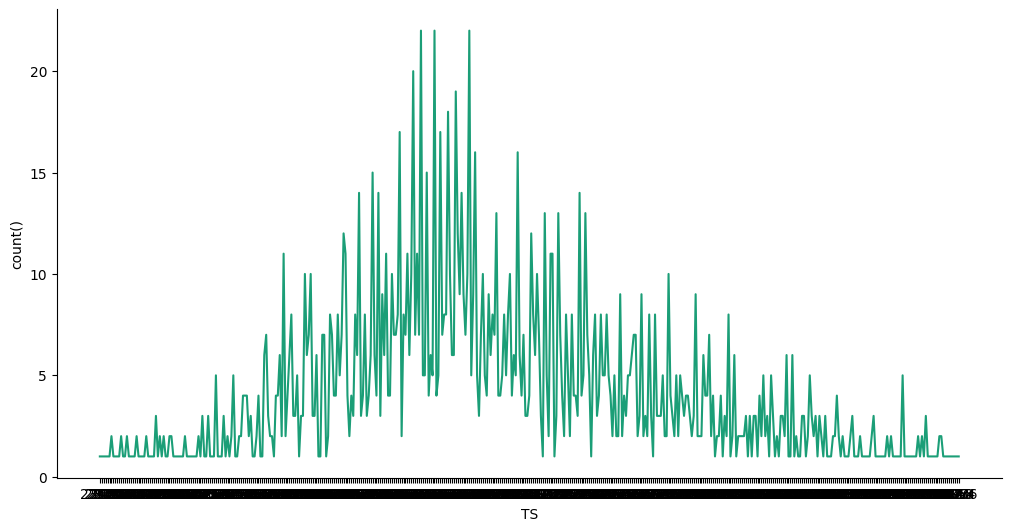

In [65]:
# @title TS vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TS']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TS'}, axis=1)
              .sort_values('TS', ascending=True))
  xs = counted['TS']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = colombo_data.sort_values('TS', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TS')
_ = plt.ylabel('count()')

In [121]:
colombo_data = colombo_data.rename(columns={
    'QV2M': 'Specific Humidity',
    'RH2M': 'Relative Humidity',
    'PRECTOTCORR': 'Precipitation',
    'T2M': 'Temperature',
    'TS': 'Skin Temperature'
})

In [122]:
print(jaffna_data.columns)

Index(['YEAR', 'MO', 'DY', 'QV2M', 'RH2M', 'PRECTOTCORR', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN'],
      dtype='object')


In [123]:
def adjust_dataset(df):

  df['YEAR'] = df['YEAR'].astype(int)
  df['DY'] = df['DY'].astype(int)


  # Apply the function to create a new 'Date' column
  df['Date'] = df.apply(lambda row: doy_to_date(row['YEAR'], row['DY']), axis=1)

  # Drop the 'YEAR' and 'DOY' columns if needed
  df.drop(columns=['YEAR', 'DY'], inplace=True)

  df.drop(columns=['T2MDEW', 'T2MWET', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN'], inplace=True)


  df = df.rename(columns={
      'QV2M': 'Specific Humidity',
      'RH2M': 'Relative Humidity',
      'PRECTOTCORR': 'Precipitation',
      'T2M': 'Temperature',
      'TS': 'Skin Temperature'
  })

  return df




In [124]:
jaffna_data = adjust_dataset(jaffna_data)
kandy_data = adjust_dataset(kandy_data)
kurunagala_data = adjust_dataset(kurunagala_data)
nuwara_eliya_data = adjust_dataset(nuwara_eliya_data)
deniyaya_matara_data = adjust_dataset(deniyaya_matara_data)
monaragala_data= adjust_dataset(monaragala_data)

In [125]:
print(monaragala_data.columns)

Index(['MO', 'Specific Humidity', 'Relative Humidity', 'Precipitation',
       'Temperature', 'Skin Temperature', 'ALLSKY_SFC_LW_DWN', 'Date'],
      dtype='object')


In [127]:
monaragala_data = monaragala_data.drop(['MO','ALLSKY_SFC_LW_DWN'], axis=1)

In [128]:
monaragala_data.head(10)

,Specific Humidity,Relative Humidity,Precipitation,Temperature,Skin Temperature,Date
0,14.53,87,0.22,21.79,21.98,2019-01-01
1,13.98,86.94,0.03,21.09,21.32,2019-01-02
2,13.67,86.06,0.03,21.03,21.18,2019-01-03
3,13.79,86.88,0.02,20.88,21.05,2019-01-04
4,15.5,88.94,0.14,22.12,22.33,2019-01-05
5,13.85,84.25,0.01,21.57,21.73,2019-01-06
6,15.26,89.06,0.06,22.02,22.28,2019-01-07
7,15.81,88.44,0.03,22.73,23.05,2019-01-08
8,15.69,88.75,0.06,22.55,22.92,2019-01-09
9,15.93,88,0.13,22.87,23.24,2019-01-10


In [130]:
print(jaffna_data.columns)


Index(['MO', 'Specific Humidity', 'Relative Humidity', 'Precipitation',
       'Temperature', 'Skin Temperature', 'Date'],
      dtype='object')


In [131]:
print(kandy_data.columns)

Index(['MO', 'Specific Humidity', 'Relative Humidity', 'Precipitation',
       'Temperature', 'Skin Temperature', 'ALLSKY_SFC_LW_DWN', 'Date'],
      dtype='object')


In [132]:
print(kurunagala_data.columns)

Index(['MO', 'Temperature', 'Skin Temperature', 'Specific Humidity',
       'Relative Humidity', 'Precipitation', 'Date'],
      dtype='object')


In [133]:
print(nuwara_eliya_data.columns)

Index(['MO', 'Specific Humidity', 'Relative Humidity', 'Precipitation',
       'Temperature', 'Skin Temperature', 'Date'],
      dtype='object')


In [134]:
print(deniyaya_matara_data.columns)

Index(['MO', 'Specific Humidity', 'Relative Humidity', 'Precipitation',
       'Temperature', 'Skin Temperature', 'Date'],
      dtype='object')


In [135]:
kandy_data = kandy_data.drop(['MO','ALLSKY_SFC_LW_DWN'], axis=1)
kurunagala_data= kurunagala_data.drop(['MO'], axis=1)
nuwara_eliya_data=nuwara_eliya_data.drop(['MO'], axis=1)
deniyaya_matara_data = deniyaya_matara_data.drop(['MO'], axis=1)

In [141]:
jaffna_data = jaffna_data.drop(['MO'], axis=1)

In [142]:
print(jaffna_data.dtypes)

Specific Humidity    object
Relative Humidity    object
Precipitation        object
Temperature          object
Skin Temperature     object
Date                 object
dtype: object


In [137]:
def turn_date_to_string(df):
  df['Date'] = df['Date'].astype(str)

  return df

In [144]:
jaffna_data=turn_date_to_string(jaffna_data)
kandy_data=turn_date_to_string(kandy_data)
kurunagala_data=turn_date_to_string(kurunagala_data)
nuwara_eliya_data=turn_date_to_string(nuwara_eliya_data)
deniyaya_matara_data=turn_date_to_string(deniyaya_matara_data)
monaragala_data=turn_date_to_string(monaragala_data)
colombo_data=turn_date_to_string(colombo_data)

In [145]:
print(jaffna_data.dtypes)

Specific Humidity    object
Relative Humidity    object
Precipitation        object
Temperature          object
Skin Temperature     object
Date                 object
dtype: object


In [146]:
print(colombo_data.dtypes)

Specific Humidity    object
Relative Humidity    object
Precipitation        object
Temperature          object
Skin Temperature     object
Date                 object
dtype: object


In [147]:
jaffna_data['Date'] = jaffna_data['Date'].astype(str)

In [148]:
print(colombo_data.dtypes)

Specific Humidity    object
Relative Humidity    object
Precipitation        object
Temperature          object
Skin Temperature     object
Date                 object
dtype: object


In [150]:
# Check for non-numeric values in Specific Humidity column
non_numeric_specific_humidity = colombo_data[colombo_data['Specific Humidity'].str.isnumeric()]

# Check for non-numeric values in Relative Humidity column
non_numeric_relative_humidity = colombo_data[colombo_data['Relative Humidity'].str.isnumeric()]

# Check for non-numeric values in Precipitation column
non_numeric_precipitation = colombo_data[colombo_data['Precipitation'].str.isnumeric()]

# Check for non-numeric values in Temperature column
non_numeric_temperature = colombo_data[colombo_data['Temperature'].str.isnumeric()]

# Check for non-numeric values in Skin Temperature column
non_numeric_skin_temperature = colombo_data[colombo_data['Skin Temperature'].str.isnumeric()]

# Print the results
print("Non-numeric values in Specific Humidity column:", non_numeric_specific_humidity)
print("Non-numeric values in Relative Humidity column:", non_numeric_relative_humidity)
print("Non-numeric values in Precipitation column:", non_numeric_precipitation)
print("Non-numeric values in Temperature column:", non_numeric_temperature)
print("Non-numeric values in Skin Temperature column:", non_numeric_skin_temperature)


Non-numeric values in Specific Humidity column:     Specific Humidity Relative Humidity Precipitation Temperature  \
512                21             90.44         10.63       27.47   

    Skin Temperature        Date  
512            27.41  2020-05-27  
Non-numeric values in Relative Humidity column:      Specific Humidity Relative Humidity Precipitation Temperature  \
0                15.62                80          0.12        24.8   
10               16.91                83           6.5       25.37   
17                14.4                77          0.03       24.12   
57               18.19                85         18.91       26.14   
76               17.52                73          9.18       28.32   
...                ...               ...           ...         ...   
1687              17.7                80          0.34       26.78   
1729             19.41                86          9.03          27   
1786              18.8                89         38.34       25.9

In [152]:
print(colombo_df.dtypes)

Location        object
Current Date    object
Next Date       object
HCHO reading    object
dtype: object


In [153]:
def merge_data(df, data):
    # Convert 'Current Date' to datetime in both DataFrames
    df['Current Date'] = pd.to_datetime(df['Current Date'])
    data['Date'] = pd.to_datetime(data['Date'])

    # Merge based on the "Date" column
    merged_data = pd.merge(df, data, how='inner', left_on='Current Date', right_on='Date')

    # Drop the additional 'Date' column from data
    merged_data.drop(columns=['Date'], inplace=True)

    return merged_data

In [154]:
jaffna_merged = merge_data(jaffna_df,jaffna_data)

In [155]:
jaffna_merged.head(100)

,Location,Current Date,Next Date,HCHO reading,Specific Humidity,Relative Humidity,Precipitation,Temperature,Skin Temperature
0,Jaffna Proper,2019-01-01,2019-01-02,5.830909719406619E-5,14.47,73.62,0,25.09,25.87
1,Jaffna Proper,2019-01-01,2019-01-02,5.830909719406619E-5,16.11,76.12,0.11,26.26,27.25
2,Jaffna Proper,2019-01-01,2019-01-02,5.830909719406619E-5,18.19,76.06,0.02,28.35,29.95
3,Jaffna Proper,2019-01-01,2019-01-02,5.830909719406619E-5,16.66,61.12,0,30.74,32.95
4,Jaffna Proper,2019-01-01,2019-01-02,5.830909719406619E-5,20.69,74.38,0.68,30.8,31.17
...,...,...,...,...,...,...,...,...,...
95,Jaffna Proper,2019-01-08,2019-01-09,9.470708011674723E-5,17.03,76.81,1.01,27.05,26.8
96,Jaffna Proper,2019-01-09,2019-01-10,2.109364950895559E-6,15.08,76.19,0,25.15,25.89
97,Jaffna Proper,2019-01-09,2019-01-10,2.109364950895559E-6,18.07,78.69,2.44,27.66,28.48
98,Jaffna Proper,2019-01-09,2019-01-10,2.109364950895559E-6,17.94,72.5,0.97,29.01,30.8


In [156]:
kandy_merged = merge_data(kandy_df,kandy_data)
kurunegala_merged = merge_data(kurunegala_df,kurunagala_data)
nuwara_eliya_merged = merge_data(nuwara_eliya_df,nuwara_eliya_data)
deniyaya_matara_merged = merge_data(deniyaya_matara_df,deniyaya_matara_data)
bibile_monaragala_merged = merge_data(bibile_monaragala_df,monaragala_data)
colombo_merged = merge_data(colombo_df,colombo_data)

In [158]:
print(colombo_merged['HCHO reading'].dtype)
print(colombo_merged['Precipitation'].dtype)

object
object


In [159]:
# Convert 'HCHO reading' and 'Precipitation' columns to numeric data types
colombo_merged['HCHO reading'] = pd.to_numeric(colombo_merged['HCHO reading'], errors='coerce')
colombo_merged['Precipitation'] = pd.to_numeric(colombo_merged['Precipitation'], errors='coerce')

# Check data types again
print(colombo_merged['HCHO reading'].dtype)
print(colombo_merged['Precipitation'].dtype)

# Calculate correlation between HCHO reading and PRCP
correlation_hcho_prcp = colombo_merged['HCHO reading'].corr(colombo_merged['Precipitation'])

print("Correlation between HCHO reading and PRCP:", correlation_hcho_prcp)


float64
float64
Correlation between HCHO reading and PRCP: -0.08018681998143481


In [160]:
# Convert 'HCHO reading' and 'Precipitation' columns to numeric data types
kandy_merged['HCHO reading'] = pd.to_numeric(kandy_merged['HCHO reading'], errors='coerce')
kandy_merged['Precipitation'] = pd.to_numeric(kandy_merged['Precipitation'], errors='coerce')

# Check data types again
print(kandy_merged['HCHO reading'].dtype)
print(kandy_merged['Precipitation'].dtype)

# Calculate correlation between HCHO reading and PRCP
correlation_hcho_prcp = kandy_merged['HCHO reading'].corr(kandy_merged['Precipitation'])

print("Correlation between HCHO reading and PRCP:", correlation_hcho_prcp)


float64
float64
Correlation between HCHO reading and PRCP: 0.005293131270110658


In [163]:
# Define a function to convert object columns to float
def convert_to_float(df):
    numeric_cols = ['HCHO reading', 'Precipitation']  # Specify columns to convert
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert object types to float for specific columns in all city merged dataframes
convert_to_float(colombo_merged)
convert_to_float(kandy_merged)
convert_to_float(kurunegala_merged)
convert_to_float(nuwara_eliya_merged)
convert_to_float(deniyaya_matara_merged)
convert_to_float(bibile_monaragala_merged)
convert_to_float(jaffna_merged)

In [164]:
# List of cities and their corresponding merged dataframes
city_dataframes = {
    'Colombo': colombo_merged,
    'Kandy': kandy_merged,
    'Kurunegala': kurunegala_merged,
    'Nuwara Eliya': nuwara_eliya_merged,
    'Deniyaya Matara': deniyaya_matara_merged,
    'Bibile Monaragala': bibile_monaragala_merged,
    'Jaffna': jaffna_merged
}

# Plot correlation matrices using heatmaps for each city
for city, df in city_dataframes.items():
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix - {city}', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


ValueError: could not convert string to float: 'Colombo Proper'

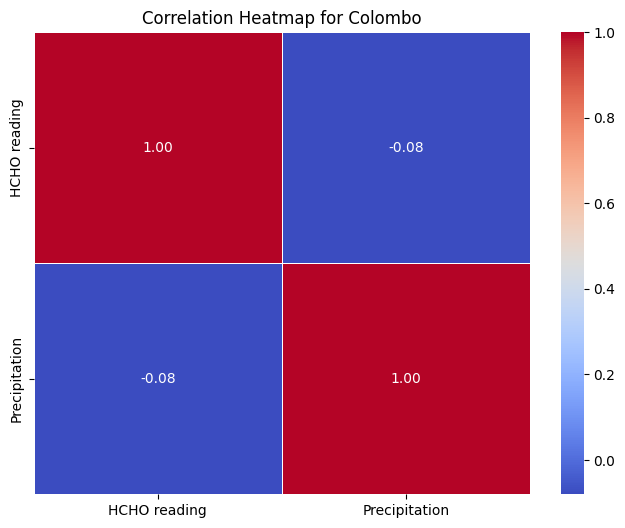

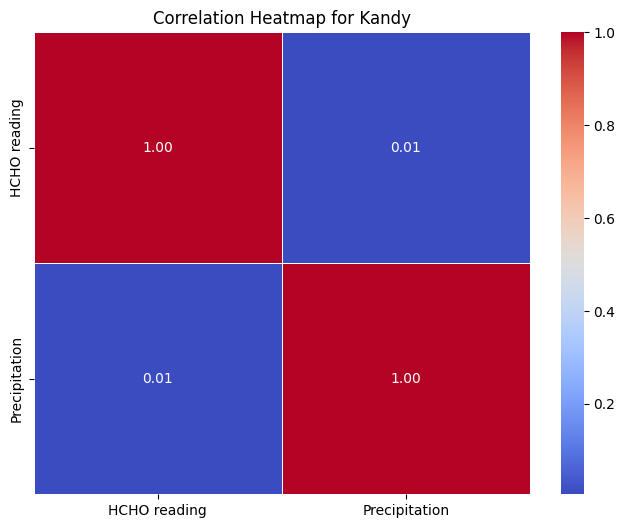

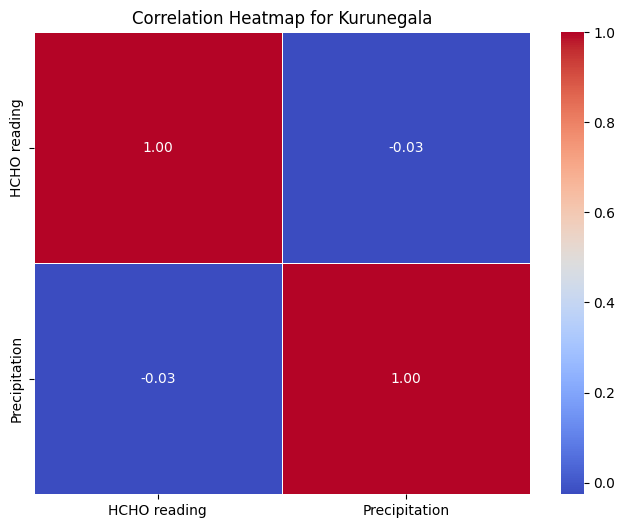

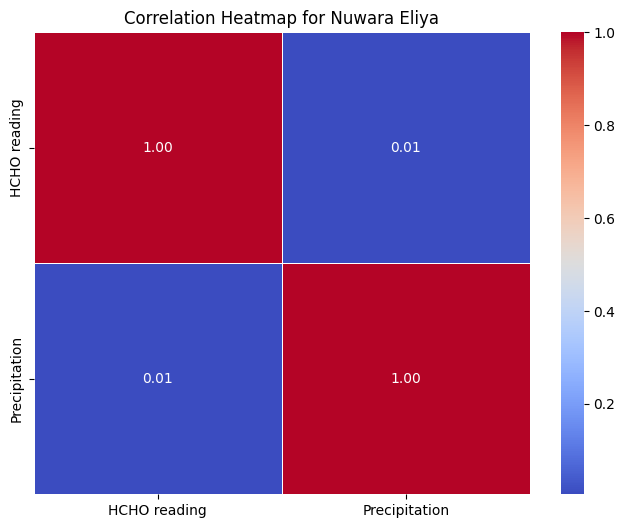

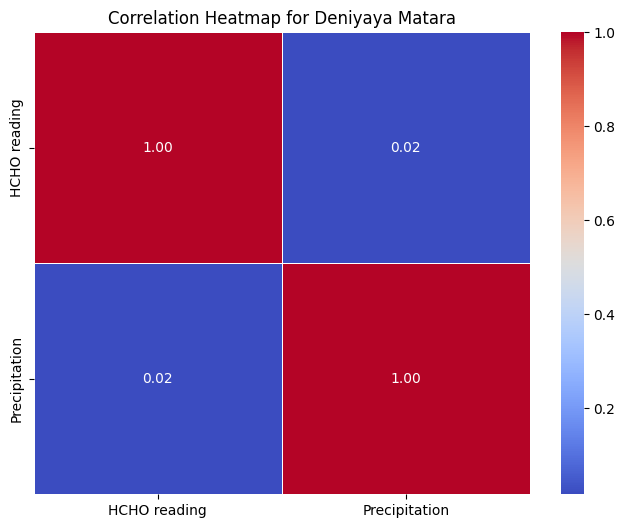

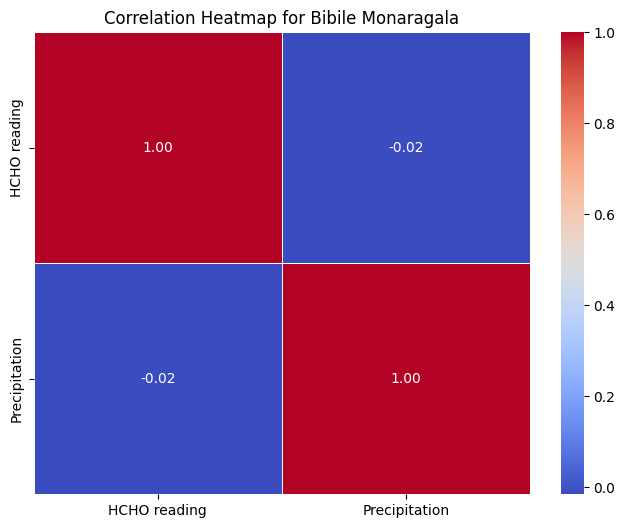

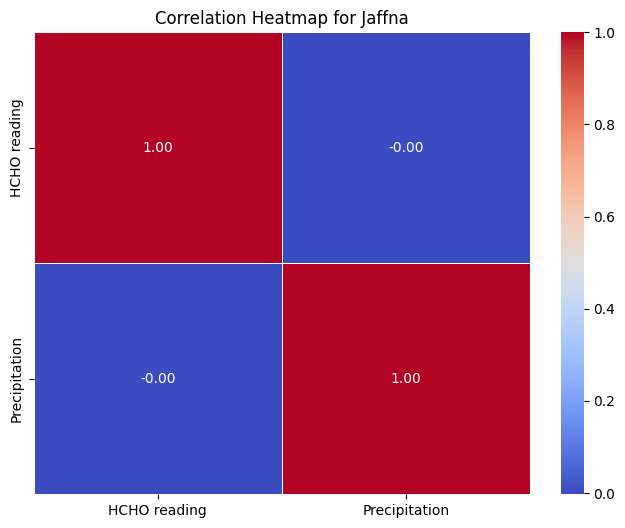

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to convert object columns to float
def convert_to_float(df):
    numeric_cols = ['HCHO reading', 'Precipitation']  # Specify columns to convert
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply conversion to float for all city merged dataframes
convert_to_float(colombo_merged)
convert_to_float(kandy_merged)
convert_to_float(kurunegala_merged)
convert_to_float(nuwara_eliya_merged)
convert_to_float(deniyaya_matara_merged)
convert_to_float(bibile_monaragala_merged)
convert_to_float(jaffna_merged)

def plot_correlation_heatmap(df, city_name):
    # Exclude non-numeric columns from correlation calculation
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate correlation matrix
    correlation_matrix = numeric_df.corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Heatmap for {city_name}')
    plt.show()


# Plot correlation heatmap for each city
city_dataframes = {
    'Colombo': colombo_merged,
    'Kandy': kandy_merged,
    'Kurunegala': kurunegala_merged,
    'Nuwara Eliya': nuwara_eliya_merged,
    'Deniyaya Matara': deniyaya_matara_merged,
    'Bibile Monaragala': bibile_monaragala_merged,
    'Jaffna': jaffna_merged
}

for city, df in city_dataframes.items():
    plot_correlation_heatmap(df, city)


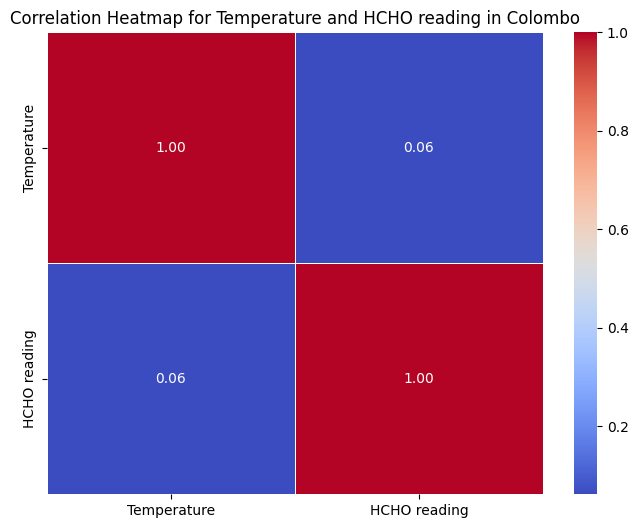

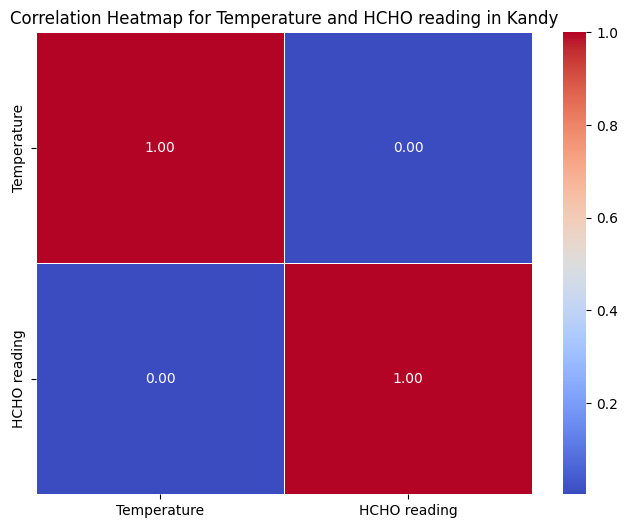

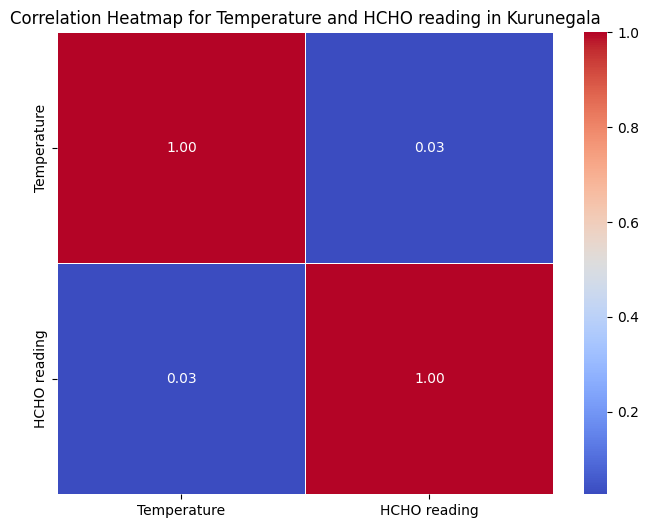

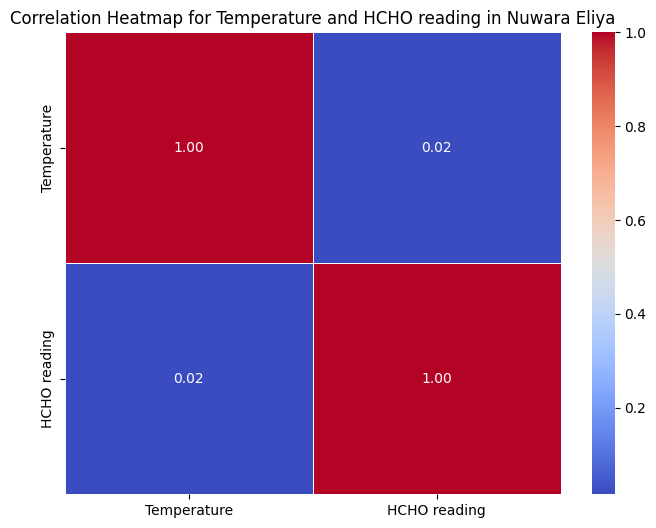

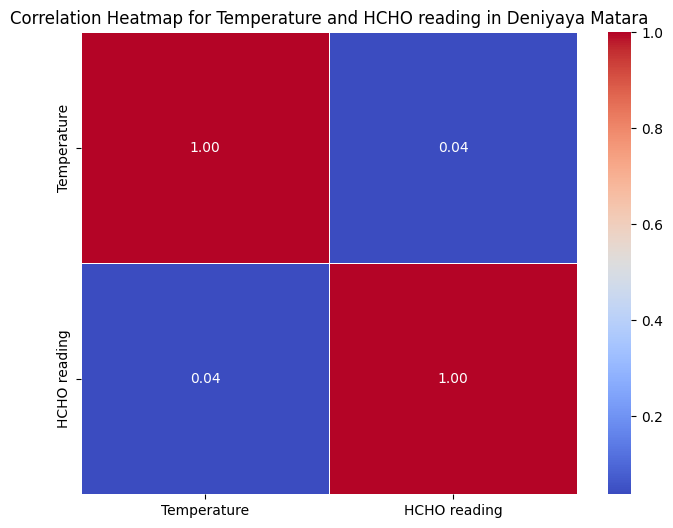

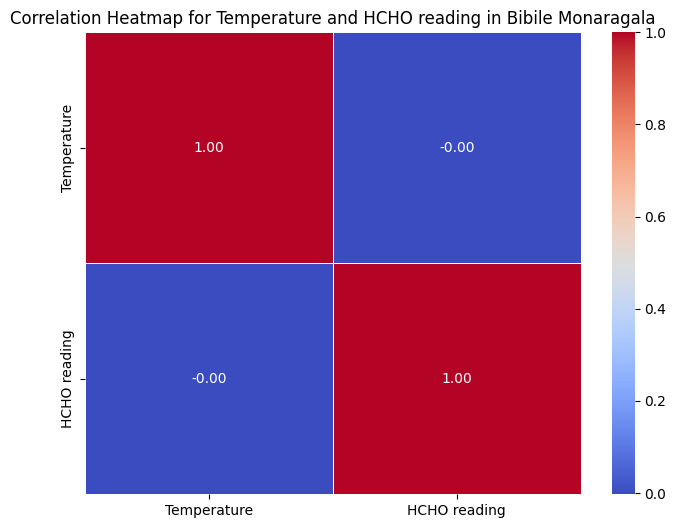

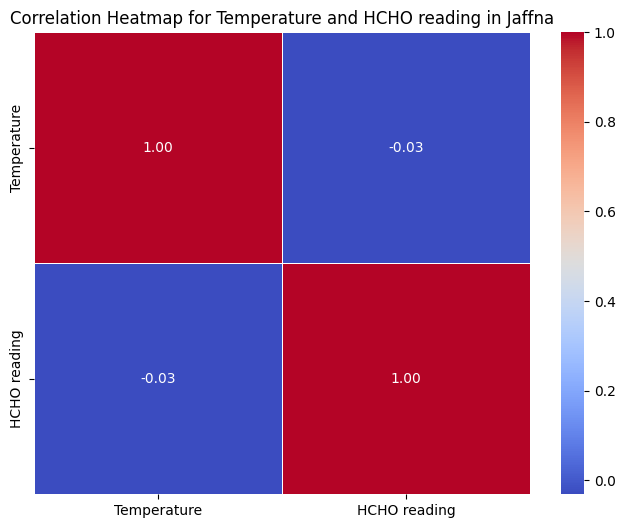

In [168]:
def plot_temperature_hcho_correlation_heatmap(df, city_name):
    # Select only 'Temperature' and 'HCHO reading' columns
    selected_cols = ['Temperature', 'HCHO reading']
    selected_df = df[selected_cols]

    # Calculate correlation matrix
    correlation_matrix = selected_df.corr()

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Heatmap for Temperature and HCHO reading in {city_name}')
    plt.show()

# Plot correlation heatmap for Temperature and HCHO reading for each city
for city, df in city_dataframes.items():
    plot_temperature_hcho_correlation_heatmap(df, city)
